[California Housing Prices Data Source](https://www.kaggle.com/datasets/camnugent/california-housing-prices) 

### **Content**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

# **1. Business Problem Understanding**


**Context**

Tempat tinggal merupakan salah satu kebutuhan pokok setiap manusia. Data set ini merupakan kumpulan data perumahan di kawasan California, Amerika Serikat yang berasal dari sensus yang dilakukan di tahun 1990 yang berisikan data-data demography (population, number of households) di suatu area, lokasi area (latitude, longitude) dan informasi general terkait rumah yang berada di area tersebut (number of rooms, number of bedrooms, median age of the house, median income & median house value)

**Problem Statement**

Tantangan dari setiap developer perumahan adalah *bagaimana menentukan harga perumahan yang tepat serta dimana lokasi untuk membangun perumahan agar tidak terjadi overpricing atau underpricing*. Hal ini tentu saja akan berdampak pada proses penjualan properti rumah tersebut.

**Goals**

Tujuan dari pemodelan ini adalah *untuk menentukan harga jual dari suatu rumah berdasarkan fitur-fitur yang ada di seputaran daerah California*. Adanya perbedaan pada berbagai fitur yang terdapat pada suatu properti, seperti jumlah kamar, lokasi, pendapatan rata-rata populasi dapat menambah keakuratan prediksi harga jual, yang mana dapat mendatangkan profit bagi setiap developer perumahan yang juga sesuai dengan target price dari developer tersebut.

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah *menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu properti dengan yang lainnya. Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan alat prediksi harga jual rumah yang baru*, yang mana akan berguna untuk developer dalam menentukan lokasi serta harga rumah di suatu kawasan tertentu.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah *RMSE, MAE, dan MAPE*, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan.

# **2. Data Understanding**

- Data berkaitan dengan rumah-rumah yang ditemukan di distrik California tertentu dan beberapa statistik ringkasan berdasarkan data sensus 1990. Setiap baris data merepresentasikan informasi terkait properti dan lokasinya

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| longitude | Float | A measure of how far west a house is; a higher value is farther west |
| latitude | Float | A measure of how far north a house is; a higher value is farther north |
| housingMedianAge | Float | Median age of a house within a block; a lower number is a newer building |
| totalRooms | Float | Total number of rooms within a block |
| totalBedrooms | Float | Total number of bedrooms within a block |
| population | Float | Total number of people residing within a block |
| households | Float | Total number of households, a group of people residing within a home unit, for a block |
| medianIncome | Float | Median income for households within a block of houses (measured in tens of thousands of US Dollars)|
| medianHouseValue | Float | Median house value for households within a block (measured in US Dollars) |
| oceanProximity | Object | Location of the house w.r.t ocean/sea |

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [51]:
# load dataset
df = pd.read_csv('data_california_house.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


**Exploratory Data Analysis**

In [53]:
# duplicate data
df_model = df.copy()

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

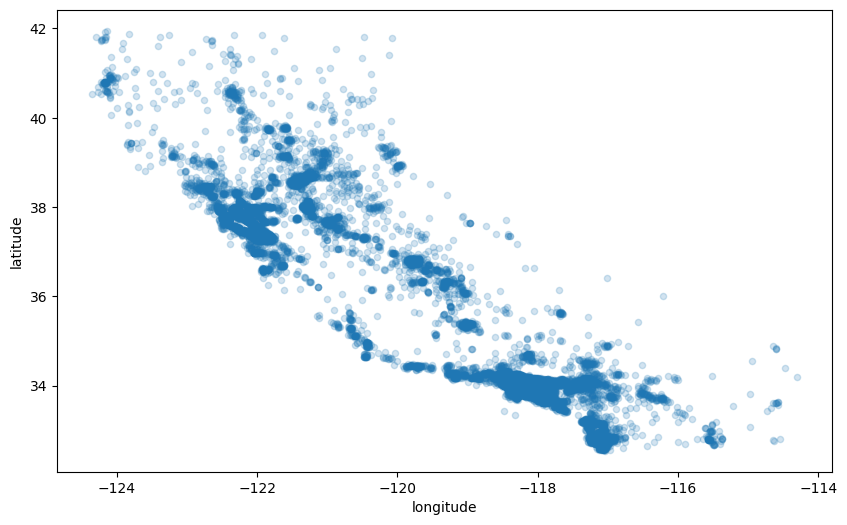

In [54]:
# visualize geographical data
df_model.plot(kind='scatter', x='longitude', y='latitude',alpha=0.2, figsize=(10,6))

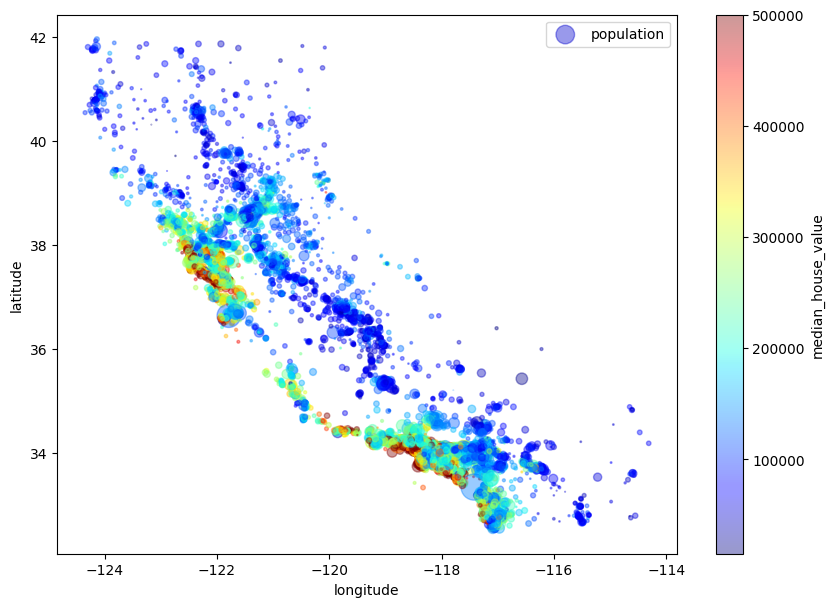

In [55]:
df_model.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=df_model["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap="jet", colorbar=True)
plt.legend()

Visualisasi di atas adalah tampilan lokasi perumahan berdasarkan letak longitude dan latitudenya di California, Amerika Serikat. Ukuran dari setiap lingkaran mewakili populasi dari suatu area (semakin besar artinya semakin banyak populasi wilayah tersebut). Sedangkan warna mewakili harga (Ungu artinya murah dan merah artinya mahal). Terlihat bahwa harga rumah semakin mahal saat lokasinya berada di kawasan pinggir pantai, sedangkan untuk area yang jauh dari kawasan pantai terlihat harganya lebih murah

<AxesSubplot: xlabel='ocean_proximity', ylabel='count'>

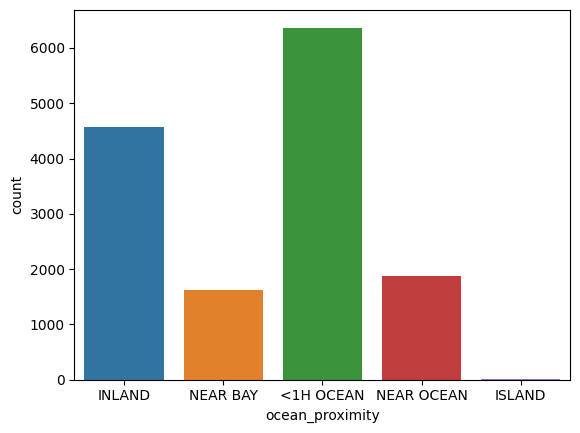

In [56]:
# counting location of houses
sns.countplot(data=df_model, x='ocean_proximity')

Dari data jarak rumah dengan laut (ocean proximity), terlihat bahwa penduduk California paling banyak bertempat tinggal area yang berjarak kurang 1 jam dari laut (<1H ocean), hal ini sesuai dengan kebiasaan penduduk California yang memang menyukai laut, karena California memang terkenal karena kawasan pantainya. Cukup banyak pula yang tinggal di pedalaman (inland).

In [57]:
# descriptive stats
df_model.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Deskriptif statistics menunjukkan bahwa nilai min dan max dari setiap feature cukup jauh yang menunjukkan potensi distribusi data tidak normal dan adanya outlier yang banyaknya cukup signifikan.

# **3. Data Preprocessing**

Pada tahap data preprocessing, kita akan melakukan pengecekan terhadap data yang ada sebelum digunakan untuk modeling. Preprocessing yang dilakukan meliputi pengecekan:

* Distribusi data
* Missing value
* Data duplikasi
* Korelasi data
* Outlier

Tujuan dari pengecekan ini adalah untuk menentukan feature engineering yang tepat terhadap fitur-fitur yang ada, sehingga nantinya akan didapatkan data yang cukup bersih dan siap diolah ke dalam model machine learning yang akan digunakan nantinya.

In [58]:
# checking detailed info of each feature
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'null%', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,null%,unique,uniqueSample
0,longitude,float64,0,0.00,806,"[-122.74, -118.6]"
1,latitude,float64,0,0.00,836,"[34.96, 36.25]"
2,housing_median_age,float64,0,0.00,52,"[17.0, 30.0]"
3,total_rooms,float64,0,0.00,5227,"[1276.0, 6474.0]"
4,total_bedrooms,float64,137,0.95,1748,"[1614.0, 400.0]"
5,population,float64,0,0.00,3498,"[2221.0, 1985.0]"
6,households,float64,0,0.00,1649,"[2311.0, 837.0]"
7,median_income,float64,0,0.00,9797,"[5.5126, 3.049]"
8,ocean_proximity,object,0,0.00,5,"[<1H OCEAN, INLAND]"
9,median_house_value,float64,0,0.00,3548,"[244000.0, 354100.0]"


**Cek Distribusi data**

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

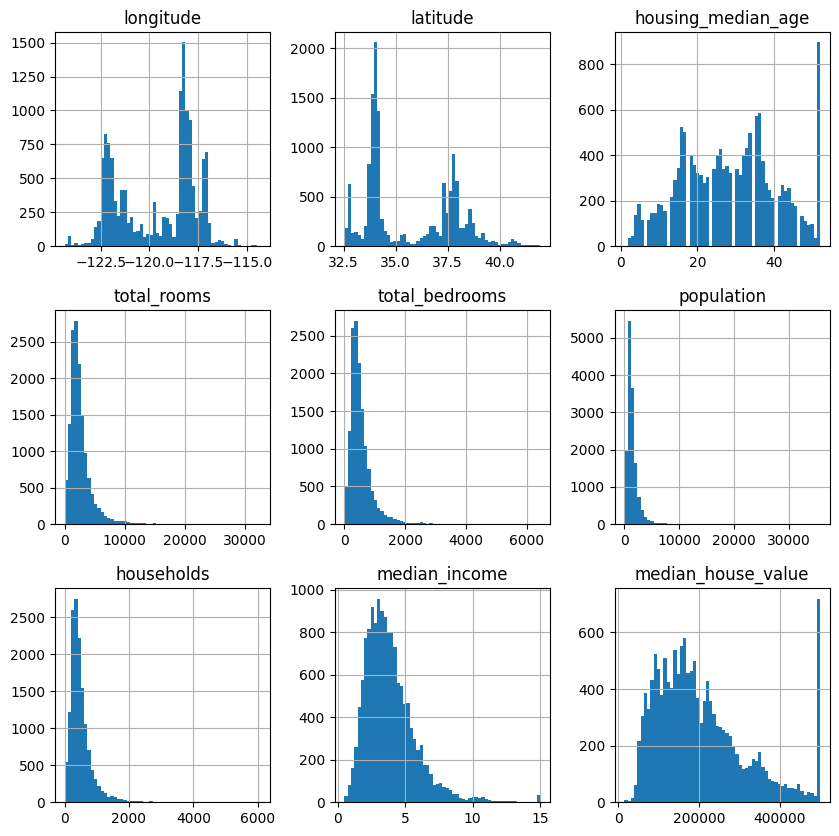

In [59]:
# checking data distribution
df_model.hist(bins=60,figsize=(10,10))

Terlihat dari grafik-grafik atas bahwa kebanyakan fitur yang ada tidak berdistribusi normal. Terlihat pula bahwa terdapat 
outlier data yang cukup mencolok di housing median age, dan median house value. Dalam kasus linear regression, persebaran data yang tidak normal ini akan dapat mempengaruhi keakuratan model, sehingga untuk fitur-fitur yang tidak berdistribusi  normal, nantinya akan diubah distribusinya menjadi atau mendekati distribusi normal dengan cara mengubah skala nya menjadi skala logaritmic dengan library sklearn yaitu power transformer. 

***"Logarithm transformation (or log transform) adalah salah satu transformasi matematis yang paling umum digunakan dalam feature engineering. Transformasi ini mengurangi efek outlier, karena normalisasi perbedaan besaran dan model menjadi lebih robust "***
https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114

**Cek Missing values**

In [60]:
# checking missing values
df_model.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [61]:
# column with missing values
col_with_missing = [col for col in df_model.columns if df_model[col].isnull().any()]

Terdapat data missing pada kolom total_bedrooms, untuk permasalahan missing value ini ada 2 cara yang bisa dilakukan. Yang pertama dengan drop kolom yang ada missing value, namun berpotensi untuk kehilangan banyak data jika data yang missing terlalu banyak. Cara kedua adalah imputation dengan mengisi kolom yang hilang dengan dengan nilai tertentu. Bisa berasal dari nilai rata-rata, median, atau bahkan berdasarkan regresi.

**Cek Data duplikat**

In [62]:
# checking duplicated data
df_model.duplicated().sum()

0

Tidak ditemukan data duplikat. 

**Cek Korelasi**

Text(0.5, 1.0, 'Correlation Matrix')

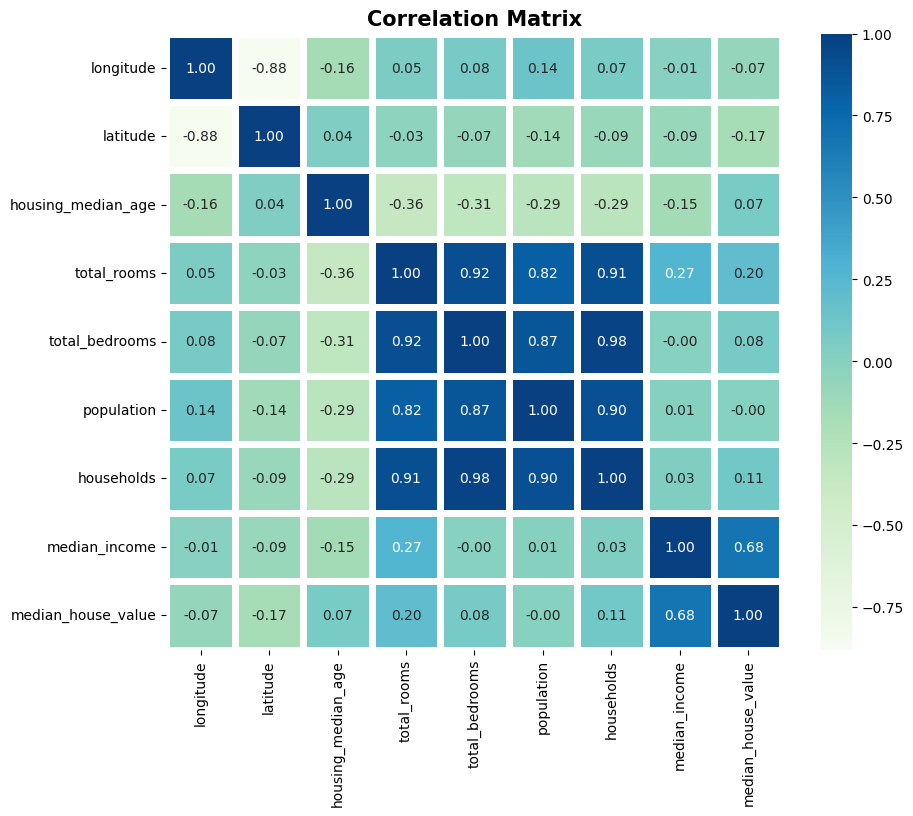

In [63]:
# checking correlation
plt.figure(figsize=(10,8))
palette = sns.color_palette("GnBu", as_cmap=True)
sns.heatmap(df.corr('spearman'), annot=True, square=True, linewidths=5, cmap = palette, fmt='.2f')
plt.title('Correlation Matrix', size=15, weight='bold')

Dari matriks korelasi diatas terlihat bahwa `median_income` adalah fitur terkuat untuk memprediksi `median_house_value`

**Cek outlier**

<AxesSubplot: >

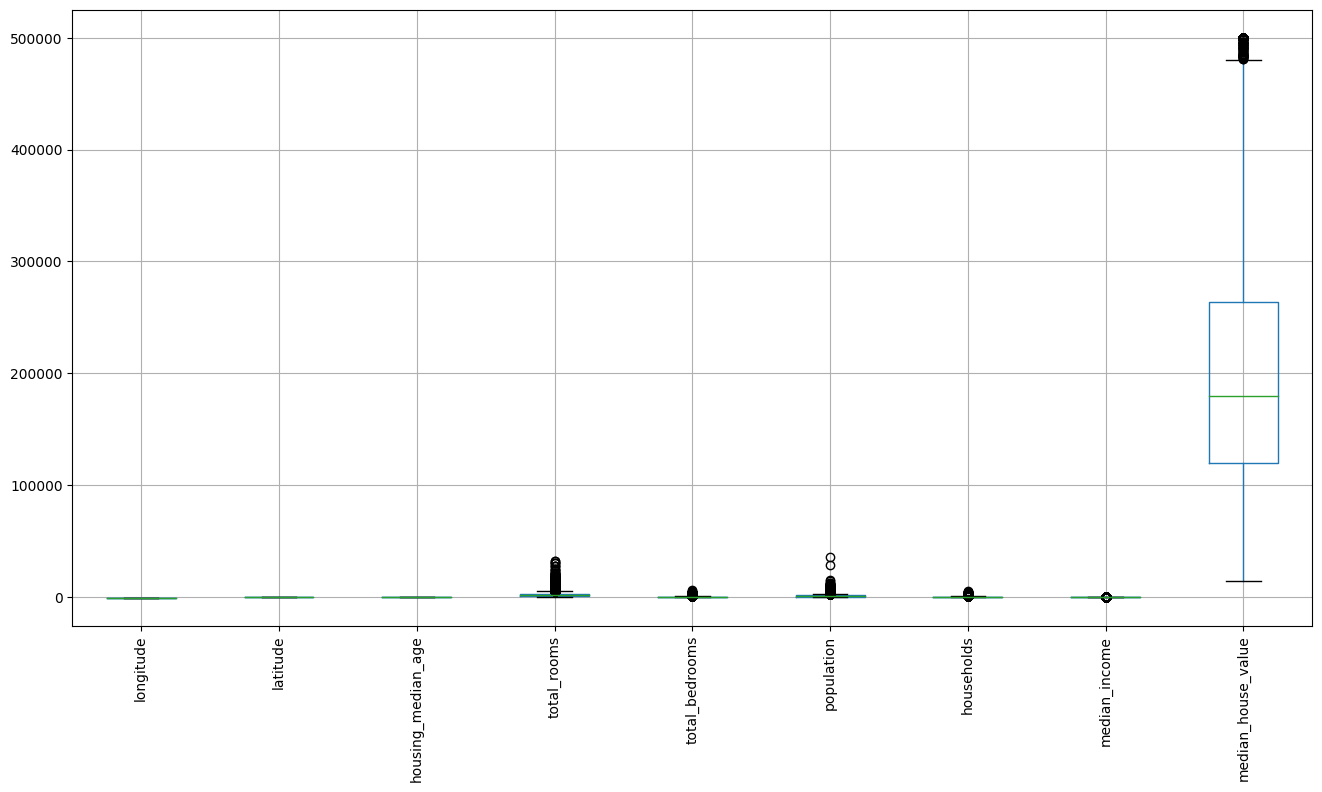

In [64]:
plt.figure(figsize=(16,8))
df.boxplot(rot=90)

Berdasarkan grafik diatas dapat dilihat ada beberapa feature yang memiliki outlier. Outlier adalah pengamatan yang jauh dari titik data lainnya dalam sampel acak dari suatu populasi. Dalam ilmu data, kita sering ingin membuat asumsi tentang populasi tertentu. Namun adanya nilai ekstrem dapat berdampak signifikan pada kesimpulan hasil interpretasi yang kita amati dari data atau model machine learning. Dengan deteksi dan penanganan terterntu, anomali ini dapat dilihat sebagai bagian dari populasi yang berbeda.

Outlier yang ada akan dihilangkan adalah yang memiliki nilai paling extreme saja, karena jika semua outliernya dihilangkan maka akan sedikit sekali data yang tersisa. Sehingga tidak merepresentasikan data yang sebenarnya.

Di bagian distribusi data, kita telah melihat 2 buah feature yang memiliki outlier yang cukup ekstrem nilainya dibanding data yang lain. yaitu kolom `housing_median_age` dan kolom `median_house_value`, kedua kolom ini yang akan kita hilangkan outlier extreme nya. Sedangkan untuk kolom yang lain akan kita biarkan saja outlier nya karena jika dihilangkan, maka informasi yang tersedia menjadi sangat sedikit.

<AxesSubplot: xlabel='median_house_value', ylabel='Density'>

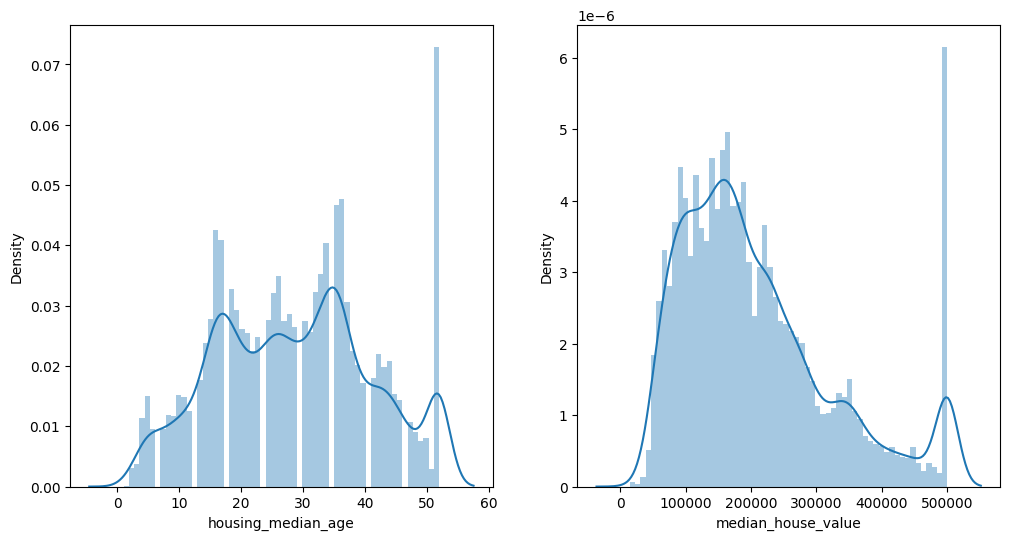

In [65]:
# distribution plot of housing_median_age and median_house_value
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(df['housing_median_age'],bins=60)

plt.subplot(1,2,2)
sns.distplot(df['median_house_value'],bins=60)

In [66]:
# fuction to find outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

<AxesSubplot: xlabel='housing_median_age', ylabel='Density'>

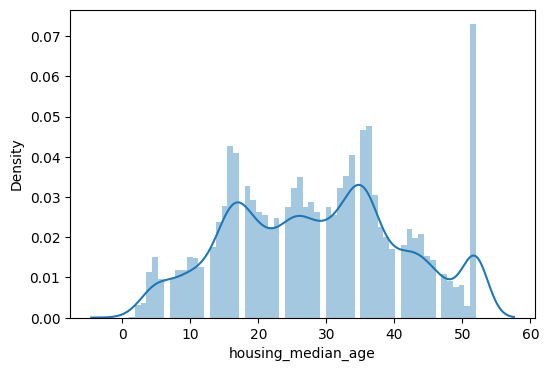

In [67]:
# check outlier in housing_median_age
plt.figure(figsize=(6,4))
sns.distplot(df_model['housing_median_age'], bins=60)

In [68]:
# find outliers
find_anomalies(df_model['housing_median_age'])

IQR: 19.0
limit_bawah: -10.5
limit_atas: 65.5


In [69]:
# descriptive stats of housing_median_age
pd.DataFrame(df_model['housing_median_age'].describe())

,housing_median_age
count,14448.000000
mean,28.618702
std,12.596694
min,1.000000
25%,18.000000
50%,29.000000
75%,37.000000
max,52.000000


In [70]:
# selecting housing_median_age data >= 45
df_model[df_model['housing_median_age'] >= 45]['housing_median_age'].value_counts().head()

52.0    896
45.0    189
46.0    176
47.0    132
48.0    111
Name: housing_median_age, dtype: int64

Extreme outlier yang ada pada feature `housing_median_age` adalah housing median age yang bernilai 52. Ada 896 data yang bernilai 52. Outlier extreme ini akan kita hilangkan agar tidak terjadi bias pada model.

In [72]:
# remove outlier in housing_median_age feature 
df_model = df_model.drop(df_model[df_model['housing_median_age'] == 52].index)

<AxesSubplot: xlabel='housing_median_age', ylabel='Density'>

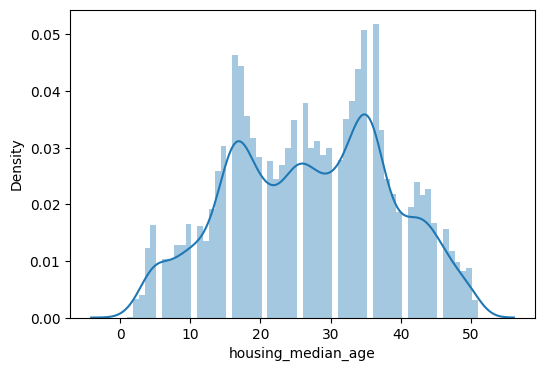

In [74]:
# check outlier in median_house_value
plt.figure(figsize=(6,4))
sns.distplot(df_model['housing_median_age'], bins=60)

<AxesSubplot: xlabel='median_house_value', ylabel='Density'>

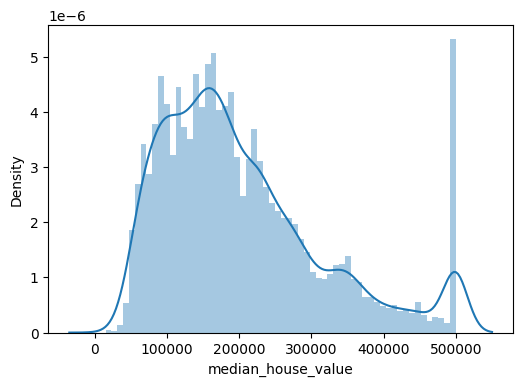

In [75]:
# check outlier in median_house_value
plt.figure(figsize=(6,4))
sns.distplot(df_model['median_house_value'], bins=60)

In [76]:
# descriptive stats of median_house_value
pd.DataFrame(df_model['median_house_value'].describe())

,median_house_value
count,13552.000000
mean,202258.681302
std,112074.451189
min,14999.000000
25%,118300.000000
50%,176750.000000
75%,256150.000000
max,500001.000000


In [77]:
# selecting housing_median_age data >= 45
df_model[df_model['median_house_value'] > 450000]['median_house_value'].value_counts().head()

500001.0    552
500000.0     10
475000.0      5
483300.0      5
450400.0      3
Name: median_house_value, dtype: int64

Pada feature `median_house_value`, extreme outlier nya adalah angka 500001 yang berjumlah 552. Outlier extreme ini akan hilangkan agar tidak terjadi bias pada model.

In [78]:
# remove outlier in median_house_value feature
df_model = df_model.drop(df_model[df_model['median_house_value'] == 500001.0].index)  

<AxesSubplot: xlabel='median_house_value', ylabel='Density'>

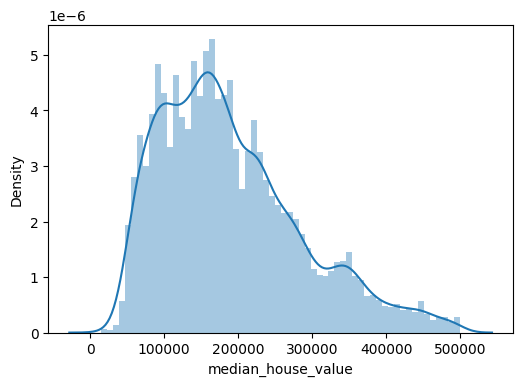

In [79]:
# check outlier in median_house_value
plt.figure(figsize=(6,4))
sns.distplot(df_model['median_house_value'], bins=60)

## **Penambahan Feature**

Dalam menilai harga suatu rumah, sebenarnya informasi jumlah kamar di satu blok kurang insightful. Yang kita inginkan sebenarnya adalah jumlah kamar per kartu keluarga (household). Demikian pula, jumlah kamar tidur di satu blok kurang insightful. Kita dapat membandingkannya dengan jumlah kamar yang ada. Dan banyaknya anggota keluarga dalam per kartu keluarga (household) juga merupakan feature yang menarik untuk ditambahkan.

In [80]:
# creating new features
df_model["rooms_per_household"] = df_model["total_rooms"]/df_model["households"]

df_model["bedrooms_per_room"] = df_model["total_bedrooms"]/df_model["total_rooms"]

df_model["population_per_household"]=df_model["population"]/df_model["households"]

In [81]:
df_model.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,3.671480,0.322517,3.018051
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,6.478022,0.167939,3.810440
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,2.518000,0.474980,3.051000
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,4.622754,0.251295,3.628743
5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0,6.495068,0.153773,2.718249


In [165]:
df_model.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.662881
total_rooms                 0.148295
rooms_per_household         0.115102
households                  0.095777
total_bedrooms              0.076341
population                  0.018212
housing_median_age          0.011614
longitude                  -0.015219
population_per_household   -0.026574
latitude                   -0.177711
bedrooms_per_room          -0.229117
Name: median_house_value, dtype: float64

Setelah melakukan penambahan feature, ternyata feature `bedrooms_per_room` memiliki korelasi yang lebih kuat terhadap feature `median_house_value` daripada feature `total_rooms` atau `total_bedrooms`. Kemungkinan ada beberapa rumah yang memiliki jumlah ratio bedroom/room lebih sedikit memiliki kecenderungan harganya lebih mahal.

In [82]:
# checking missing values
df_model.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              127
population                    0
households                    0
median_income                 0
ocean_proximity               0
median_house_value            0
rooms_per_household           0
bedrooms_per_room           127
population_per_household      0
dtype: int64

Sekarang, terdapat missing values pada feature `bedrooms_per_room` pula karena ada merupakan hasil dari pembagian antara `total_bedrooms` dengan `households`. Missing value ini akan di-handle dengan menggunakan iterative imputer nantinya

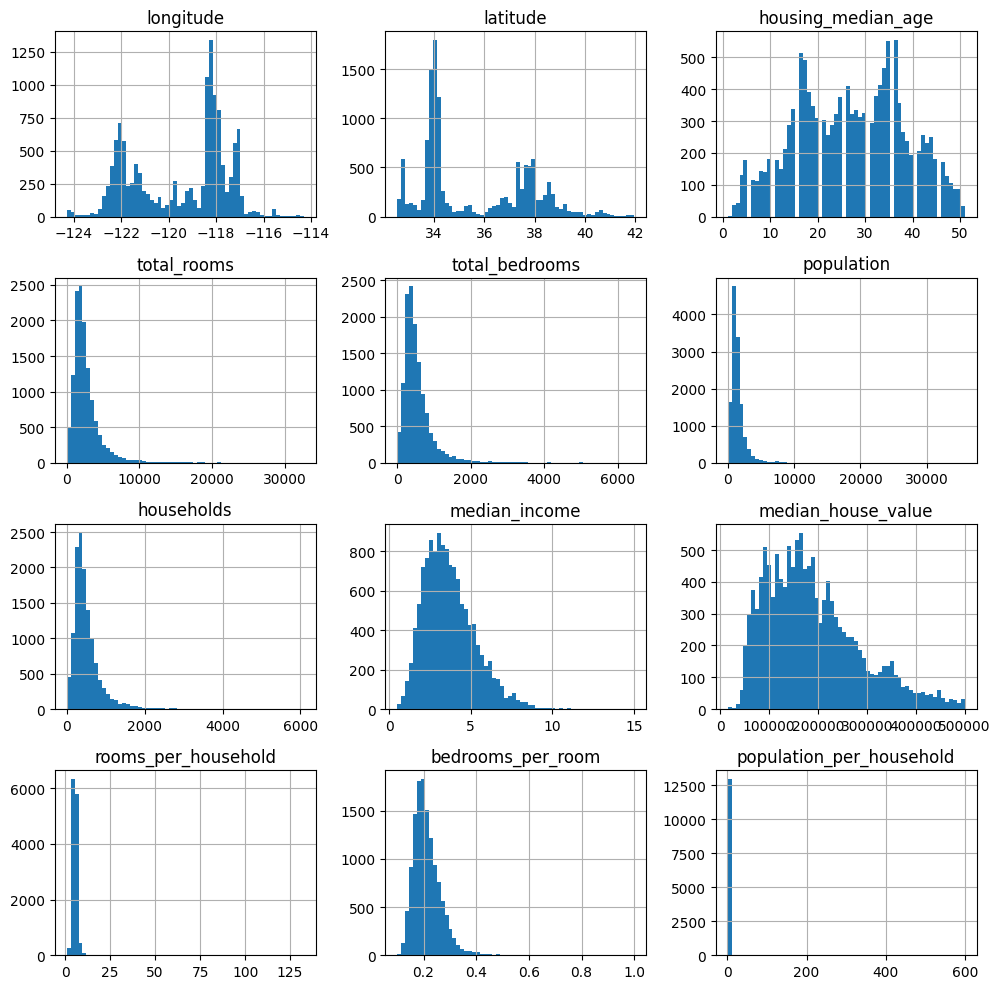

In [84]:
# checking data distribution
df_model.hist(bins=60,figsize=(10,10))
plt.tight_layout()

Feature-feature yang baru ditambahkan terlihat tidak berdistribusi normal. Akan di-scaling juga dengan menggunakan logaritmic scale.

**Feature Engineering**

***Scheme***

Target : `median_house_value`

For categorical data :
* OneHotEncoding : `ocean_proximity`

For numerical data :
* Iterative imputer : `total_bedrooms` , `bedrooms_per_room`
* PowerTransformer (log Scale) : `housing_median_age`, `total_rooms`, `total_bedrooms`, `population`, `households, median_income`, `rooms_per_household`, `bedrooms_per_room`, `population_per_household`
* Passthrough : longitude, latitude

In [167]:
df_model

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,3.671480,0.322517,3.018051
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,6.478022,0.167939,3.810440
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,2.518000,0.474980,3.051000
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,4.622754,0.251295,3.628743
5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0,6.495068,0.153773,2.718249
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0,6.000000,0.174277,3.251142
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0,5.349282,0.174419,3.095694
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0,3.641221,NaN,1.791349
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0,4.540598,0.234353,2.247863


Beberapa model machine learning algorithm dapat bekerja dengan baik jika semua variabel nya berada dalam skala yang sama, seperti scaling semua variabel menjadi antara 0-1, ini disebut dengan normalisasi. Ini mempengaruhi algoritma yang menggunakan jumlah bobot input, seperti model linier dan neural network, serta model yang menggunakan ukuran jarak seperti SVM dan KNN. Oleh karena itu, sebaiknya dilakukan scaling untuk data inputan, dan bahkan mencoba untuk mengubah distribusi data menjadi normal atau lebih sesuai dengan distribusi gaussian probability menggunakan power transformer. Hal ini juga berlaku untuk variabel output atau target variabel seperti numerikal value yang diprediksi ketika modeling menggunakan algorithma yang bertujuan untuk masalah regresi problem seperti linear regression dan sebagainya.

***"Untuk masalah regresi, seringkali lebih baik untuk melakukan scaling pada input dan variabel target"*** https://machinelearningmastery.com/how-to-transform-target-variables-for-regression-with-scikit-learn/

Untuk variabel inputan kita akan menggunakan library sklearn yaitu ["PowerTransformer"](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html) untuk mengubah skala nya menjadi logaritmic, sedangkan untuk output hasil dari modelingnya juga akan diubah skalanya menjadi logaritmic menggunakan library sklearn ["TransformTargetRegressor"](https://scikit-learn.org/stable/modules/generated/sklearn.compose.TransformedTargetRegressor.html), namun akan diubah diubah kembali menjadi seperti semula ketika interpretasi.

In [85]:
# import library for feature engineering
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [89]:
categorical_col = ['ocean_proximity']
scale_col = [
'housing_median_age',
'total_rooms',
'population',
'households',
'median_income',
'rooms_per_household',
'population_per_household' 
 ]


onehot = OneHotEncoder(drop='first', handle_unknown='ignore')

numerical_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer()),
    ('scaler',PowerTransformer(method='box-cox'))
])

transformer = ColumnTransformer([
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_col),
        ('imp_scal', numerical_transformer, ['total_bedrooms', 'bedrooms_per_room']),
        ('scaler', PowerTransformer(method='box-cox'),scale_col)
],remainder='passthrough')

**Data Splitting**

In [90]:
X = df_model.drop(['median_house_value'], axis=1)
y = df_model['median_house_value']

**Train Test Splitting**

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val= train_test_split(
    X,
    y,  
    test_size=0.25,
    random_state=234)

**Cross Validation**

In [92]:
# import library for modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [93]:
# define algorithms
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=234)
rf = RandomForestRegressor(random_state=234)
xgb = XGBRegressor(random_state=234)

# modeling with logarithm scale
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# scaling data
scaler = StandardScaler()

# algorithm candidate
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# cross validation to choose best algorithm
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=234)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-59119.47759735 -58165.15439864 -56770.8272864  -57900.83570977
 -55996.72680432] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-40486.02810279 -40824.49118394 -39138.5462768  -40637.60327176
 -39163.69602897] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.22904274 -0.23649986 -0.23093974 -0.22655191 -0.226254  ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-54923.71906749 -52912.66170961 -52434.7468262  -55440.50527965
 -48078.20962232] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-36253.27802478 -36021.63791769 -34732.7061807  -37371.13378056
 -33045.96278272] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,


In [220]:
# results evaluation of 5 algorithms
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-57572.536109,1796.958232,-40049.383974,872.251921,-0.229821,0.007048
1,KNN Regressor,-52481.821658,900.057544,-35159.925678,572.652579,-0.194730,0.003007
2,DecisionTree Regressor,-65987.792243,2767.298497,-44266.253077,1480.873337,-0.253413,0.010092
3,RandomForest Regressor,-46950.506516,1837.933128,-30896.973379,842.435447,-0.171603,0.005396
4,XGBoost Regressor,-45149.269932,1905.510021,-29501.869352,1009.784141,-0.163516,0.002549


In [94]:
# results evaluation of 5 algorithms
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-57590.604359,1093.278073,-40050.072973,741.824413,-0.229858,0.003738
1,KNN Regressor,-52757.968501,2604.420261,-35484.943737,1479.904087,-0.196220,0.007109
2,DecisionTree Regressor,-65691.783474,1097.324272,-44265.373846,805.181215,-0.251221,0.006681
3,RandomForest Regressor,-47129.580545,2036.734414,-31107.652968,1178.748110,-0.172608,0.004549
4,XGBoost Regressor,-44565.330118,2526.435416,-29281.528147,1116.327903,-0.161686,0.003733


In [95]:
from sklearn.model_selection import cross_validate

lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=234)
rf = RandomForestRegressor(random_state=234)
xgb = XGBRegressor(random_state=234)


log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)


linreg_pipe = Pipeline([('transformer', transformer), ('linreg', log_lr)])
knn_pipe = Pipeline([('transformer', transformer), ('knn', log_knn)])
dt_pipe = Pipeline([('transformer', transformer), ('dt', log_dt)]) 
rf_pipe = Pipeline([('transformer', transformer), ('rf', log_rf)])
xgb_pipe = Pipeline([('transformer', transformer), ('xgboost', log_xgb)])

metric = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error',]

def model_evaluation(model, metric):
    model_cv = cross_validate(model, X_train, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=1), scoring = metric, return_train_score=True)
    return model_cv

linreg_pipe_cv_score = model_evaluation(linreg_pipe, metric)
knn_pipe_cv_score = model_evaluation(knn_pipe, metric)
dt_pipe_cv_score = model_evaluation (dt_pipe, metric)
rf_pipe_cv_score = model_evaluation(rf_pipe, metric)
xgb_pipe_cv_score = model_evaluation(xgb_pipe, metric)


Metric yang biasanya digunakan untuk mengukur kinerja dari suatu algoritma dalam masalah regresi adalah dengan menghitung Root Mean Square Error (RMSE), Mean Square Error (MSE) dan Mean Absolute Error (MAE).

RMSE adalah akar jumlah dari kesalahan kuadrat atau selisih antara nilai sebenarnya dengan nilai prediksi yang telah ditentukan dibagi dengan jumlah data. 

MSE sama halnya dengan RMSE, hanya saja tidak menggunakan proses akar. Pada tahap ini, jika nilai error nya semakin besar maka semakin besar nilai MSE yang dihasilkan. 

MAE menunjukkan nilai kesalahan rata-rata yang error dari nilai sebenarnya dengan nilai prediksi. Sedangkan Mean Absolute Percentage Error adalah lanjutan dari penentuan nilai MAE dengan menentukan nilai presentase yang dihasilkan

Dalam model regresi, untuk mengetahui keakuratan kinerja model suatu algoritma, kita dapat mengambilnya dari nilai yang memiliki kesalahan kecil. Dengan kata lain, semakin kecil nilai error yang dihasilkan maka semakin dekat nilai atau jarak antara nilai aktual dengan nilai prediksi.

In [96]:
# RMSE

algo = ['Lin-Reg','KNN','DT','RF','XGB']
scorecv = [linreg_pipe_cv_score,knn_pipe_cv_score,dt_pipe_cv_score,rf_pipe_cv_score,xgb_pipe_cv_score]
scorecrossval = []
scoremeancrossval = []
scorestdcorssval = []
for j in scorecv:
    scorecrossvalresult = -1 * j['test_neg_root_mean_squared_error'].round(5)
    scoremeancrossvalresult = -1 * j['test_neg_root_mean_squared_error'].mean().round(5)
    scorestdcorssvalresult = j['test_neg_root_mean_squared_error'].std().round(5)

    scorecrossval.append(scorecrossvalresult)
    scoremeancrossval.append(scoremeancrossvalresult)
    scorestdcorssval.append(scorestdcorssvalresult)


pd.set_option('display.max_colwidth',None)
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'CV_RMSE': scorecrossval,
    'Mean_RMSE': scoremeancrossval,
    'Std_RMSE': scorestdcorssval
})

,Model,CV_RMSE,Mean_RMSE,Std_RMSE
0,Linear Regression,"[54502.06262, 56556.79807, 59045.93972, 59104.17593, 58653.70421]",57572.53611,1796.95823
1,KNN Regressor,"[50829.34424, 52916.58754, 52799.77362, 52372.71226, 53490.69063]",52481.82166,900.05754
2,DecisionTree Regressor,"[66444.29965, 60592.68731, 69608.28251, 63437.50659, 66224.34905]",65261.42502,3044.51557
3,RandomForest Regressor,"[44214.92534, 45809.25039, 49111.92099, 47242.1601, 48694.86935]",47014.62523,1820.15878
4,XGBoost Regressor,"[42188.80305, 43909.68728, 47833.23676, 45997.12809, 45885.32189]",45162.83541,1937.23117


Berdasarkan nilai RMSE, jika dilihat dari nilai rata-rata nya, XGBoost memilki nilai yang paling baik, kemudian diikuti dengan RandomForest. Namun jika dilihat dari standard deviasi, KNN regressor merupakan yang paling baik, diikuti dengan Linear Regression

In [97]:
# MAE

scorecv = [linreg_pipe_cv_score,knn_pipe_cv_score,dt_pipe_cv_score,rf_pipe_cv_score,xgb_pipe_cv_score]
scorecrossval = []
scoremeancrossval = []
scorestdcorssval = []
for j in scorecv:
    scorecrossvalresult = -1 * j['test_neg_mean_absolute_error'].round(5)
    scoremeancrossvalresult = -1 * j['test_neg_mean_absolute_error'].mean().round(5)
    scorestdcorssvalresult = j['test_neg_mean_absolute_error'].std().round(5)

    scorecrossval.append(scorecrossvalresult)
    scoremeancrossval.append(scoremeancrossvalresult)
    scorestdcorssval.append(scorestdcorssvalresult)


pd.set_option('display.max_colwidth',None)
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'CV_MAE': scorecrossval,
    'Mean_MAE': scoremeancrossval,
    'Std_MAE': scorestdcorssval
})

,Model,CV_MAE,Mean_MAE,Std_MAE
0,Linear Regression,"[38583.04338, 39649.41065, 40265.95809, 40666.57789, 41081.92986]",40049.38397,872.25192
1,KNN Regressor,"[34361.19526, 35735.11962, 35278.49889, 34641.76369, 35783.05093]",35159.92568,572.65258
2,DecisionTree Regressor,"[44345.71429, 41991.81374, 46086.20879, 43375.44066, 44910.16593]",44141.86868,1387.25919
3,RandomForest Regressor,"[29760.91988, 30622.98039, 31652.00232, 30651.47756, 32230.32863]",30983.54175,864.45271
4,XGBoost Regressor,"[28040.81456, 29286.72641, 31066.56887, 28959.20994, 30180.44157]",29506.75227,1037.69672


Berdasarkan nilai MAE, jika dilihat dari nilai rata-rata nya, XGBoost memilki nilai yang paling baik, kemudian diikuti dengan RandomForest. Namun jika dilihat dari standard deviasi, KNN regressor merupakan yang paling baik, diikuti dengan RandomForest

In [177]:
# MAPE

scorecv = [linreg_pipe_cv_score,knn_pipe_cv_score,dt_pipe_cv_score,rf_pipe_cv_score,xgb_pipe_cv_score]
scorecrossval = []
scoremeancrossval = []
scorestdcorssval = []
for j in scorecv:
    scorecrossvalresult = -1 * j['test_neg_mean_absolute_percentage_error'].round(5)
    scoremeancrossvalresult = -1 * j['test_neg_mean_absolute_percentage_error'].mean().round(5)
    scorestdcorssvalresult = j['test_neg_mean_absolute_percentage_error'].std().round(5)

    scorecrossval.append(scorecrossvalresult)
    scoremeancrossval.append(scoremeancrossvalresult)
    scorestdcorssval.append(scorestdcorssvalresult)


pd.set_option('display.max_colwidth',None)
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'CV_MAPE': scorecrossval,
    'Mean_MAPE': scoremeancrossval,
    'Std_MAPE': scorestdcorssval
})

,Model,CV_MAPE,Mean_MAPE,Std_MAPE
0,Linear Regression,"[0.22641, 0.22521, 0.22129, 0.23979, 0.23641]",0.22982,0.00705
1,KNN Regressor,"[0.19301, 0.19628, 0.19014, 0.19519, 0.19904]",0.19473,0.00301
2,DecisionTree Regressor,"[0.26489, 0.24165, 0.25221, 0.24328, 0.26503]",0.25341,0.01009
3,RandomForest Regressor,"[0.17057, 0.16957, 0.1657, 0.17038, 0.1818]",0.17160,0.00540
4,XGBoost Regressor,"[0.1598, 0.16406, 0.16528, 0.16155, 0.16689]",0.16352,0.00255


Berdasarkan nilai MAPE, jika dilihat dari nilai rata-rata nya, XGBoost memilki nilai yang paling baik, kemudian diikuti dengan RandomForest. Jika dilihat dari standard deviasi XGboost juga merupakan yang paling baik, diikuti dengan KNN regressor

Selanjutnya, akan dilakukan prediksi pada test set dengan menggunakan 2 model benchmark terbaik yaitu XGboost dan RandomForest

# **4. Data Modeling**

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

In [98]:
# benchmarking 2 best models
models = {
    'RandomForest': RandomForestRegressor(random_state=234),
    'XGB': XGBRegressor(random_state=234)   
}

score_rmse = []
score_mae = []
score_mape = []

# predicting with test data
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score_rmse.append(np.sqrt(mean_squared_error(y_val, y_pred)))
    score_mae.append(mean_absolute_error(y_val, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_val, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
RandomForest,45867.111135,31231.751779,0.186677
XGB,43002.353937,29352.560637,0.177021


- Ketika dilakukan prediksi pada test set, performa XGBoost secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari keseluruhan nilai metric yang dicoba. Terlihat di semua metric baik itu RMSE, MAE, dan MAPE, nilai dari XGBoost lebih baik performanya dibanding RandomForest.

- Hasil prediksi pada test set ini juga tidak jauh berbeda dengan hasil prediksi pada training set. 

Training Set :                                   

                - RMSE : 45162.83541           
                - MAE  : 29506.75227	        
                - MAPE : 0.16352          
                      
 Test Set :
 
                - RMSE  : 43002.353937
                - MAE   : 29352.560637
                - MAPE  : 0.177021

Hal ini menandakan model ini bisa dipercaya karena nilai keduanya tidak berbeda jauh. Jika nilai metric dari training set dan test set berbeda jauh artinya terjadi overfitting atau underfitting pada model. 


**Set Hyperparameter**

**Hyperparameter Tuning**

Karena model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

Algorithma XGboost seringkali menjadi algorithma yang paling baik dikarenakan boosting merupakan suatu metode machine learning yang sifatnya iteratif. 

Konsepnya, boosting memperbaiki suatu model machine learning dengan cara memberikan perhatian lebih terhadap data poin yang hasil klasifikasinya salah. 
Kita mentransformasi weak learner menjadi strong learner. Weak learner dapat dipandang sebagai model machine learning yang performanya tidak terlalu bagus.

Siklus dalam gradien boosting adalah pertama kita membuat satu tree lalu kita perbaiki modelnya dengan cara memberikan
perhatian lebih atau bobot yang lebih besar terhadap data poin yang hasil klasifikasinya salah. Proses dilakukan terus menerus hingga titik tertentu. Prediksi akhir diperoleh dengan cara menggabungkan hasil prediksi dari tree yang sudah dibuat sebelumnya. 

In [99]:
# tree depth
max_depth = list(np.arange(1, 11))

# learning rate
learning_rate = list(np.arange(1, 100)/100)

# number of trees
n_estimators = list(np.arange(100, 201))

# number of rows in trees (% of total rows in train set)
subsample = list(np.arange(2, 10)/10)

# gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # the larger the value, the model becomes more conservative

# number of features to be used in each tree (% of total rows in train set)
colsample_bytree = list(np.arange(1, 10)/10)

# alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # the larger the value, the model becomes more conservative


# hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [100]:
# benchmark model with hyperparameter tuning
xgb = XGBRegressor(random_state=234, verbosity=0)

# make algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # only one metric can be chosen for optimization
    random_state = 234  
)

In [101]:
# fitting training data to get best parameter
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['ocean_proximity']),
                                                                              ('imp_scal',
                                                                               Pipeline(steps=[('imputer',
                                                                                                IterativeImputer()),
                                                                                               ('scaler',
                                                                                                PowerTransformer(method='box-co...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=234, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [102]:
# tuning result passed into dataframe. Arranged in order of RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
3,11.301418,0.549486,0.137699,0.009954,0.9,0.16681,183,5,0.2,8,...,523.382841,1,-0.174617,-0.173898,-0.168026,-0.172370,-0.182677,-0.174318,0.004765,1
28,8.430774,0.221472,0.153334,0.046866,0.9,10.0,138,5,0.09,1,...,711.388191,2,-0.181372,-0.180332,-0.175401,-0.181009,-0.190649,-0.181753,0.004944,2
23,5.494992,0.157150,0.095609,0.014477,0.3,1.29155,149,9,0.1,5,...,944.530375,4,-0.190893,-0.190819,-0.191940,-0.184525,-0.195545,-0.190744,0.003555,4
44,4.079777,0.074570,0.104982,0.011730,0.3,0.021544,112,7,0.09,8,...,773.624047,3,-0.188146,-0.189531,-0.186714,-0.185107,-0.194696,-0.188839,0.003277,3
13,4.329975,0.100338,0.090164,0.014578,0.9,0.007743,133,5,0.42,5,...,752.371075,5,-0.189097,-0.191060,-0.190628,-0.187896,-0.202379,-0.192212,0.005207,5


In [103]:
# checking best score and best parans
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -44046.55059010441
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.1668100537200059, 'model__n_estimators': 183, 'model__max_depth': 5, 'model__learning_rate': 0.2, 'model__gamma': 8, 'model__colsample_bytree': 0.9}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [104]:
# XGBoost model 
model = {'XGB': XGBRegressor(random_state=234)}

# define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# fitting model
xgb_tuning.fit(X_train, y_train)

# predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_val)

# save RMSE, MAE & MAPE metrics after tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_val, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_val, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_val, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,42738.470894,29103.278753,0.175005


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [105]:
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,43002.353937,29352.560637,0.177021


In [106]:
score_after_tuning

,RMSE,MAE,MAPE
XGB,42738.470894,29103.278753,0.175005


Model mengalami sedikit peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning.
- RMSE, MAE & MAPE sebelum tuning: 43002.35, 29352.56, 0.177
- RMSE, MAE & MAPE setelah tuning: 42738.47, 29103.28, 0.175

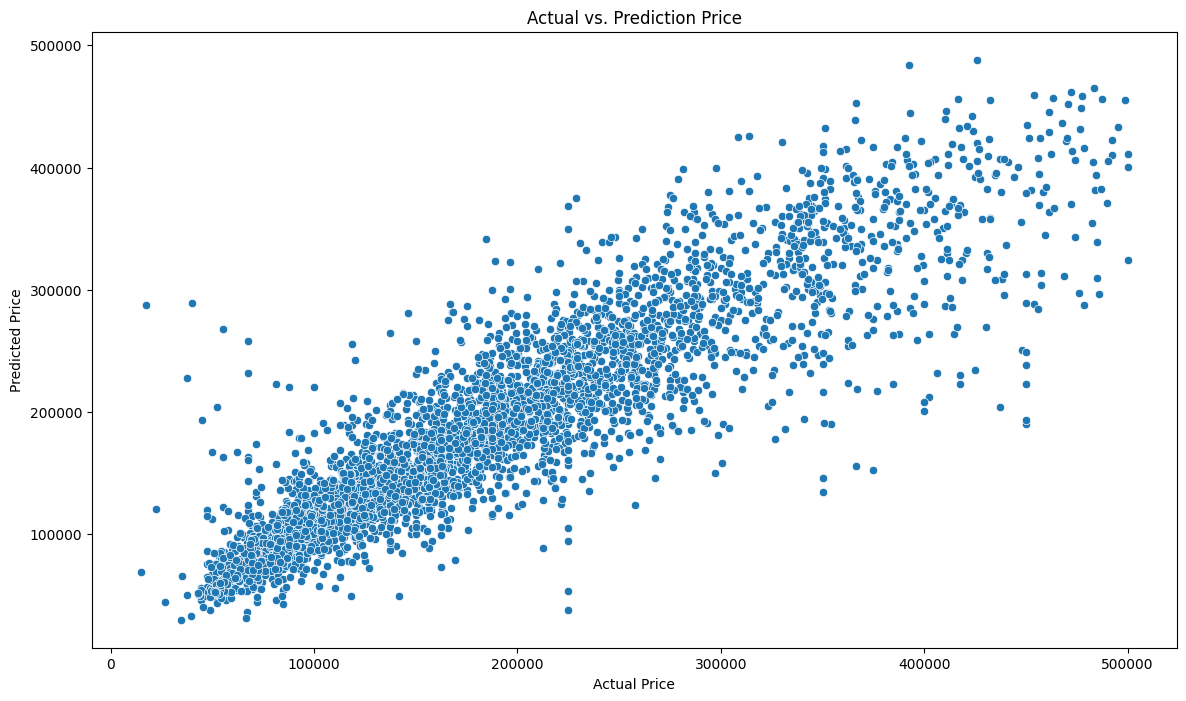

In [107]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_val, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

Berdasarkan grafik diatas, perbandingan antara nilai harga yang diprediksi dengan harga actual terlihat cukup bagus dengan membentuk suatu pola yg linear. Namun masih terdapat sedikit error yang dimana terkadang ada data yang diprediksi nilainya rendah namun nilai aktualnya tinggi. tetapi hal ini masih dalam batas yang wajar mengingat nilai MAPE yang didapat 
yaitu 17.5% dimana artinya dapat dikategorikan kedalam 'Good forecasting'

![img](https://www.researchgate.net/profile/Chao-Hung-Wang-3/publication/27219891/figure/tbl1/AS:394224022376454@1471001739320/MAPE-CRITERIA-FOR-MODEL-EVALUATION.png)

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (median_house_value), kita dapat mengeceknya melalui function feature_importances_.

In [108]:
transformer.transformers_

[('onehot',
  OneHotEncoder(drop='first', handle_unknown='ignore'),
  ['ocean_proximity']),
 ('imp_scal',
  Pipeline(steps=[('imputer', IterativeImputer()),
                  ('scaler', PowerTransformer(method='box-cox'))]),
  ['total_bedrooms', 'bedrooms_per_room']),
 ('scaler',
  PowerTransformer(method='box-cox'),
  ['housing_median_age',
   'total_rooms',
   'population',
   'households',
   'median_income',
   'rooms_per_household',
   'population_per_household']),
 ('remainder', 'passthrough', [0, 1])]

In [113]:
# get output feature names for transformation
print(transformer.transformers_[0][1].get_feature_names_out())

print(transformer.transformers_[1][2])
print(transformer.transformers_[2][2])

['ocean_proximity_INLAND' 'ocean_proximity_ISLAND'
 'ocean_proximity_NEAR BAY' 'ocean_proximity_NEAR OCEAN']
['total_bedrooms', 'bedrooms_per_room']
['housing_median_age', 'total_rooms', 'population', 'households', 'median_income', 'rooms_per_household', 'population_per_household']


In [114]:
df_model.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [116]:
features = (list(transformer.transformers_[0][1].get_feature_names_out()) + 
                transformer.transformers_[1][2] + 
                transformer.transformers_[2][2] + 
                ['longitude','latitude'])

features

['ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN',
 'total_bedrooms',
 'bedrooms_per_room',
 'housing_median_age',
 'total_rooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'population_per_household',
 'longitude',
 'latitude']

In [190]:
# length of features
len(features)

15

In [117]:
xgb_tuning

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['ocean_proximity']),
                                                 ('imp_scal',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer()),
                                                                  ('scaler',
                                                                   PowerTransformer(method='box-cox'))]),
                                                  ['total_bedrooms',
                                                   'bedrooms_per_room']),
                                                 ('scaler',
                                                  PowerTransformer(meth...
                              feature_types=None, gamma=8, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='', learning_rate=0.2,
                              max_bin=256, max_cat_threshold=64,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=5, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=183, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=234, ...))])

In [118]:
# feature importance coeficients
feature_importances = pd.DataFrame(data = xgb_tuning[1].feature_importances_, index = features, columns = ["coef"])
feature_importances.sort_values(by = ["coef"], ascending = False, inplace = True)
feature_importances

,coef
ocean_proximity_INLAND,0.429521
median_income,0.240128
population_per_household,0.058931
latitude,0.044363
longitude,0.044279
housing_median_age,0.030055
ocean_proximity_NEAR BAY,0.028572
ocean_proximity_NEAR OCEAN,0.026588
rooms_per_household,0.019585
bedrooms_per_room,0.014587


<AxesSubplot: >

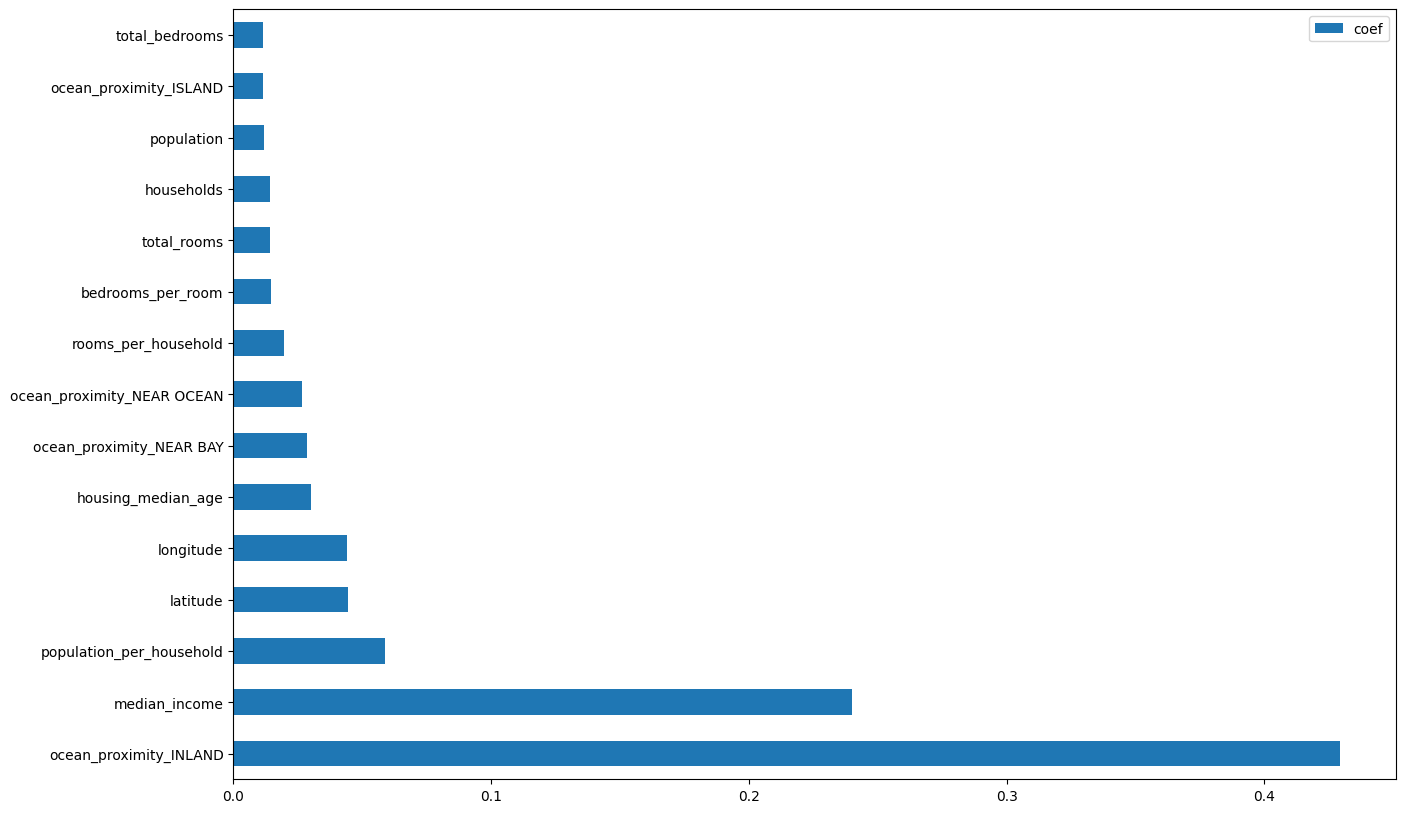

In [119]:
# visualizing feature importance coeficients
feature_importances.plot(kind = "barh", figsize = (15,10))

# **5. Conclusion**

Berdasarkan pemodelan yang sudah dilakukan, fitur `ocean_proximity` dan `median_income` menjadi fitur yang menjadi predictor terkuat untuk `median_house_value`. 

Dalam kasus ini rumah yang berada di kawasan pinggir dengan ocean view merupakan rumah yang paling mahal dibandingkan dengan rumah yang berada di lokasi lainnya. Untuk median income, semakin besar rata-rata penghasilan penduduk suatu wilayah, maka akan semakin mahal harga rumahnya, begitu pula sebaliknya.

Jika kita melihat berdasarkan nilai RMSE, didapati nilai RMSE cukup tinggi, hal ini dikarenakan metric RMSE memiliki beberapa kelemahan: RMSE tergantung oleh scala dari data, jadi semakin besar skala, maka nilai RMSE nya juga besar. RMSE juga dipengaruhi oleh outlier, semakin banyak outlier maka RMSE juga bisa semakin besar. Seperti yang kita ketahui data kita memiliki outlier yang cukup banyak, tapi jika outlier nya dihilangkan maka kita akan loss informasi yang banyak pula. Oleh karena itu pada kasus ini kita lebih melihat hasil pemodelan menggunakan metric MAPE yang tidak terlalu sensitive terhadap adanya outlier, dimana hasil dari metric MAPE sendiri yg sebesar 17.5% yang artinya persen kesalahan hasil prediksi data dibanding data actual hanya sekitar 17.5%. Selain itu nilai MAPE 17.5% artinya termasuk kedalam kategory 'Good Forecast' atau model peramalan baik.


# **6.Recommendation**

Hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi :

1. Penambahan fitur-fitur yang memiliki korelasi langsung dengan harga suatu rumah, misal luas rumah, fasilitas rumah, perusahaan developernya , dll.

2. Data perlu diperbaharui karena data yang digunakan merupakan data yang sudah lama yaitu tahun 1990. Data ini tentu saja sudah sangat tidak relevan dengan kondisi pada saat ini. Karena adanya faktor inflasi dan sebagainya.

3. Dari sisi modeling mungkin dapat ditingkatkan dengan metode hyperparameter yang lebih baik seperti gridsearch. Metode gridsearch mencoba seluruh kombinasi hyperparameter. Sedangkan pada randomized search yang kita gunakan dalam model tidak semua kombinasi hyperparameter dicoba tetapi kita memilih secara acak dari seluruh kemungkinan kombinasi.

4. Model ini dapat digunakan untuk prediksi harga perumahan yang memiliki fitur sejenis dengan dataset California house. Karena jika dilihat dari perbandingan nilai train dan test nya, performa model cukup stabil artinya model cenderung tidak overfitting/underfitting. Namun perlu diingat kembali bahwa data ini merupakan harga rumah di tahun 1990, yang tentu saja akan jauh berbeda dengan harga rumah di tahun sekarang, ini berkaitan dengan range harga harga yang akan diprediksi, karena jika range nya melewati atau diluar range harga dalam model, maka hasilnya akan menjadi bias

# **Save and Load Model**

In [120]:
# save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('California_Housing_Price_XGB.sav', 'wb'))

In [121]:
# load model
filename = 'California_Housing_Price_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [122]:
loaded_model.predict(X_val)

array([163422.11, 301484.78,  72843.3 , ...,  80062.24, 208961.45,
       283898.1 ], dtype=float32)

# **Test Model**

In [132]:
# create dataframe
price_pred = pd.DataFrame({
    'latitude': [34.274647, 33.787914],
    'longitude': [-119.229034, -117.853104],
    'housing_median_age': [17.0, 50],
    'total_rooms': [1899.0, 7500],
    'total_bedrooms': [275.0, 2500],
    'population': [945.0, 4500],
    'households': [264.0, 1550],
    'median_income': [5.5681, 6],
    'ocean_proximity': ['INLAND', '<1H OCEAN']
})

In [135]:
price_pred["rooms_per_household"] = price_pred["total_rooms"] / price_pred["households"]

price_pred["bedrooms_per_room"] = price_pred["total_bedrooms"] / price_pred["total_rooms"]

price_pred["population_per_household"]= price_pred["population"] / price_pred["households"]

In [136]:
price_pred

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,34.274647,-119.229034,17.0,1899.0,275.0,945.0,264.0,5.5681,INLAND,7.193182,0.144813,3.579545
1,33.787914,-117.853104,50.0,7500.0,2500.0,4500.0,1550.0,6.0000,<1H OCEAN,4.838710,0.333333,2.903226


In [137]:
# predict median_house_value
loaded_model.predict(price_pred)

array([202719.9 , 368422.53], dtype=float32)